# Import packages

In [ ]:
# Added to be able to run in Google Colab. Run this cell if running the notebook in a hosted runtime. Don't run for a local runtime.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pickle
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

# Split data into training and test(validation) sets
 


In [ ]:
# Set paths to image stacks, masks, and annotation files. 

path_to_image = '/content/gdrive/MyDrive/UTRECHT/Detection/Training_Tiles3'
path_to_label = '/content/gdrive/MyDrive/UTRECHT/Detection/Masks9_noNPP_circleMask'
# path_to_annotCombo = '/content/gdrive/MyDrive/UTRECHT/Detection/AnnotCombo9_noNPP_circleMask'

In [ ]:
# Set the project name and save directory for the project
project_name = '01_Generalized_Model_FullTrainingData'
trial = 'Trial_03' 

exp_dir = '/content/gdrive/MyDrive/exp' # experiment directory
exp_dir = os.path.join(exp_dir, project_name)
save_dir = os.path.join(exp_dir, trial) 
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

In [ ]:
# Make a list of the names of all samples. The list is not randomized. 

tmpSampleList = [sample for sample in os.listdir(path_to_label)
                 if os.path.isdir(os.path.join(path_to_label, sample))]

len(tmpSampleList)

2986

In [ ]:
# Split the dataset into 80% training and 20% test (validation) sets

train_det_dict = {}
test_det_dict = {}
train_det_list = []
test_det_list = []

trRatio = 0.8
if len(tmpSampleList)>0:
    trNum = round(len(tmpSampleList)*trRatio)
    tsNum = len(tmpSampleList) - trNum
    start_num = tsNum*1   # You may change the multiplier for each trial to test different splits of data. e.g. 4 for trial 1, 0 for trial 2, 1 for trial 3.
    
    train_det_list += tmpSampleList[0:start_num]
    test_det_list += tmpSampleList[start_num:start_num + tsNum]    
    train_det_list += tmpSampleList[start_num + tsNum:]          
else: 
    train_det_list += tmpSampleList

In [ ]:
# Save all the info in a pickle file to be read in the next notebook

dbinfo = {}
dbinfo['train_det_list'] = train_det_list
dbinfo['test_det_list'] = test_det_list

with open(os.path.join(save_dir,'dbinfo.pkl'), 'wb') as handle:
    pickle.dump(dbinfo, handle) # , protocol=pickle.HIGHEST_PROTOCOL

In [ ]:
# See the lengths of the training and test datasets

with open(os.path.join(save_dir,'dbinfo.pkl'), 'rb') as handle:
    dbinfo = pickle.load(handle)

dbinfo.keys(), len(dbinfo['train_det_list']), len(dbinfo['test_det_list'])

(dict_keys(['train_det_list', 'test_det_list']), 2389, 597)

In [ ]:
dbinfo['train_det_list']

['PALIV_27-28_slide 1_scan1_35',
 'PALIV_27-28_slide 1_scan1_37',
 'PALIV_27-28_slide 1_scan1_42',
 'PALIV_27-28_slide 1_scan1_46',
 'PALIV_27-28_slide 1_scan1_45',
 'PALIV_27-28_slide 1_scan1_47',
 'PALIV_27-28_slide 1_scan1_52',
 'PALIV_27-28_slide 1_scan1_50',
 'PALIV_27-28_slide 1_scan1_55',
 'PALIV_27-28_slide 1_scan1_61',
 'PALIV_27-28_slide 1_scan1_59',
 'PALIV_27-28_slide 1_scan1_62',
 'PALIV_27-28_slide 1_scan1_64',
 'PALIV_27-28_slide 1_scan1_69',
 'PALIV_27-28_slide 1_scan1_73',
 'PALIV_27-28_slide 1_scan1_71',
 'PALIV_27-28_slide 1_scan1_75',
 'PALIV_27-28_slide 1_scan1_88',
 'PALIV_27-28_slide 1_scan1_87',
 'PALIV_27-28_slide 1_scan1_90',
 'PALIV_27-28_slide 1_scan1_92',
 'PALIV_27-28_slide 1_scan1_97',
 'PALIV_27-28_slide 1_scan1_99',
 'PALIV_27-28_slide 1_scan1_101',
 'PALIV_27-28_slide 1_scan1_102',
 'PALIV_27-28_slide 1_scan1_112',
 'PALIV_27-28_slide 1_scan1_116',
 'PALIV_27-28_slide 1_scan1_117',
 'PALIV_27-28_slide 1_scan1_126',
 'PALIV_27-28_slide 1_scan1_127',
 'P

In [ ]:
dbinfo['test_det_list']

['PALIV_B_Sample_33-34_glyc_scan1_221',
 'PALIV_B_Sample_33-34_glyc_scan1_222',
 'PALIV_B_Sample_33-34_glyc_scan1_223',
 'PALIV_B_Sample_33-34_glyc_scan1_225',
 'PALIV_B_Sample_33-34_glyc_scan1_230',
 'PALIV_B_Sample_33-34_glyc_scan1_235',
 'PALIV_B_Sample_33-34_glyc_scan1_233',
 'PALIV_B_Sample_33-34_glyc_scan1_237',
 'PALIV_B_Sample_33-34_glyc_scan1_242',
 'PALIV_B_Sample_33-34_glyc_scan1_241',
 'PALIV_B_Sample_33-34_glyc_scan1_246',
 'PALIV_B_Sample_33-34_glyc_scan1_251',
 'PALIV_B_Sample_33-34_glyc_scan1_250',
 'PALIV_B_Sample_33-34_glyc_scan1_256',
 'PALIV_B_Sample_33-34_glyc_scan1_255',
 'PALIV_B_Sample_33-34_glyc_scan1_258',
 'PALIV_B_Sample_33-34_glyc_scan1_262',
 'PALIV_B_Sample_33-34_glyc_scan1_259',
 'PALIV_B_Sample_33-34_glyc_scan1_270',
 'PALIV_B_Sample_33-34_glyc_scan1_267',
 'PALIV_B_Sample_33-34_glyc_scan1_271',
 'PALIV_B_Sample_33-34_glyc_scan1_272',
 'PALIV_B_Sample_33-34_glyc_scan1_274',
 'PALIV_B_Sample_33-34_glyc_scan1_273',
 'PALIV_B_Sample_33-34_glyc_scan1_275',


# Visualize an image and mask

In [ ]:
set_name='train'  #'test'
sampleList = dbinfo[set_name+'_det_list']

idx = 0  #choose an index less than or equal to the length of the sampleList

current_example= sampleList[idx] 
current_image_path= os.path.join(path_to_image, current_example)
current_distTransform_path=os.path.join(path_to_label, current_example)

z = 6     # set to the desired z-plane (0, 8)
img_stack_paths = []
for file in sorted(os.listdir(str(current_image_path))):
    if file.endswith('.bmp'):
      tmpImg = os.path.join(str(current_image_path), file)
      img_stack_paths.append(tmpImg)
image = PIL.Image.open(img_stack_paths[z])

for file in os.listdir(current_distTransform_path):
  if file.endswith('.bmp'):
    mask_distanceTransform = PIL.Image.open(os.path.join(current_distTransform_path, file))
    mask_distanceTransform=np.array(mask_distanceTransform)

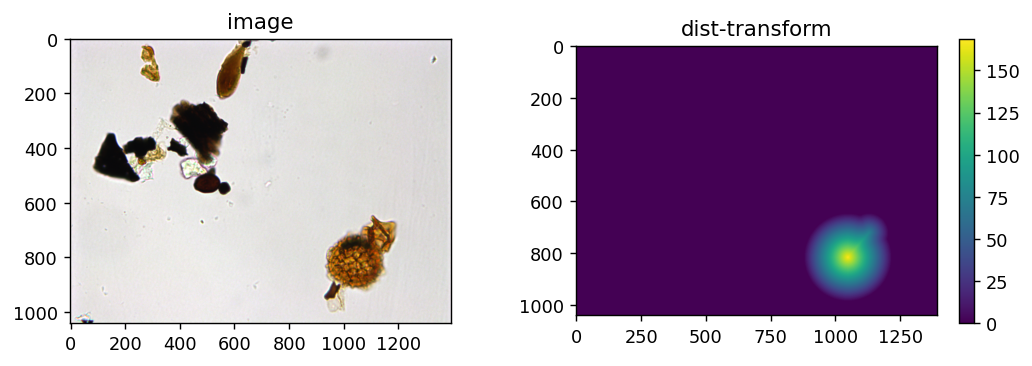

In [ ]:
numSample2Show = 1
figWinNumHeight, figWinNumWidth = 3, 2
plt.figure(figsize=(10, 10), dpi=128, facecolor='w', edgecolor='k') # figsize -- inch-by-inch
plt.clf()
subwinCount = 1    


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(image)
#plt.axis('off')
plt.title('image')


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(mask_distanceTransform)
#plt.axis('off')
plt.title('dist-transform')
plt.colorbar()